<a href="https://colab.research.google.com/github/smarvar/Machine-Learnig-practice/blob/master/TP8/MultispectralAnalisys.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import all content drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import the following packages
import os, sys
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# rute HSI
path = "/content/drive/MyDrive/Colab Notebooks/Multispectral-Analysis-of-Satellite-Imagery-with-Python-master/hyp/"
# list with HSI
dirs = os.listdir(path)

In [ ]:
"""# renombrando las imagenes dejando solo el número de la banda
for file in dirs:
  #file.find('WL_') #encontrar la posición que contiene el número de la banda
  im1 = Image.open(path+file)
  im1 = im1.save(path+'rename/'+file[56:62]+'.tif') #
im1.close()"""

In [4]:
# Generate hypercube with all bands 
hypercube = np.zeros(shape=(648,1022,386))
cont=0
path2 =path+'rename/'
dirs2 = os.listdir(path2)
dirs2 = sorted(dirs2)

for file in dirs2:
  im = Image.open(path2+file)
  hypercube[:,:,cont] = im
  cont+=1 
im.close()

In [5]:
# number of bands
len(dirs2)

386

In [6]:
# Generate list with bands numbers
dirs3 = []
for a in dirs2:
  dirs3.append(a[0:5])

In [7]:
# See a hypercube band
print(hypercube[:,:,100])

[[ 3669.  3284.     0. ...  7257.  7429. 11805.]
 [ 6161.  3145.  1211. ...  7590.  6965. 12061.]
 [ 6398.  4586.    65. ...     0.  8971. 13894.]
 ...
 [12202. 13887. 15213. ... 12817. 11252. 12932.]
 [13444. 14442. 16230. ... 20512. 15670. 15510.]
 [11565. 12819. 17192. ... 21166. 18825. 18628.]]


<Figure size 720x360 with 0 Axes>

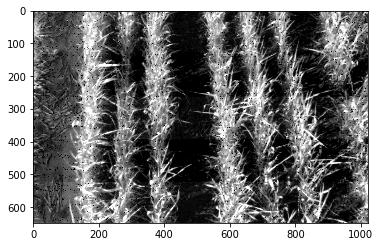

In [8]:
# Plot a hypercube band
fig = plt.figure(figsize=(10,5))   
fig, (ax1) = plt.subplots(1, 1)
ax1.set_title('')
ax1.imshow(hypercube[:,:,300], cmap = 'gray')

In [9]:
pip install pysptools # Install the pysptools library that contains the Endmembers algorithms to use 

     |████████████████████████████████| 8.1MB 4.8MB/s 
  Created wheel for pysptools: filename=pysptools-0.15.0-cp27-none-any.whl size=8133750 sha256=a0e2fdf1429e7fc7b77a97b1e7dfa6f5b9afd6f6ca47bd78a596cce4a7e92c49
  Stored in directory: /root/.cache/pip/wheels/bf/60/be/a6719d91bfa59135201feb034c7069e4146aa576fc0dc9e624
Successfully built pysptools


In [10]:
#  import the following packages to use
import pysptools.util as util
import pysptools.eea as eea #endmembers extraction algorithms
import pysptools.abundance_maps as amap
import time 

%matplotlib inline
#for clean output, to not print warnings, don't use when developing script
import warnings
warnings.filterwarnings('ignore')

N-FINDR endmembers induction algorithm.

In [ ]:
ee = eea.NFINDR() #N-FINDR endmembers induction algorithm.
n_endmembers =5 # number endmembers to find
U = ee.extract(hypercube,n_endmembers,maxit=None,normalize=False,ATGP_init=True)

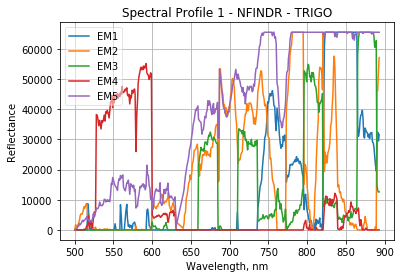

In [ ]:
# Spectral endmembers 
ee_axes = {}
ee_axes['wavelength'] = [float(i) for i in dirs3]
ee_axes['x']='Wavelength, nm' #x axis label
ee_axes['y']='Reflectance' #y axis label 
ee.display(axes=ee_axes,suffix='TRIGO')

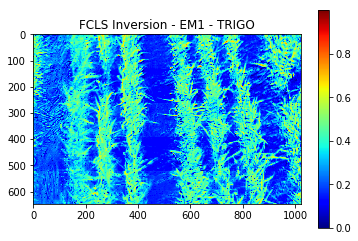

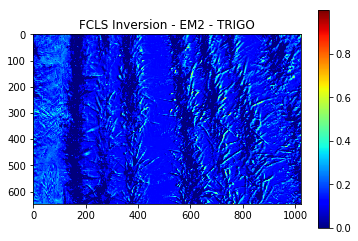

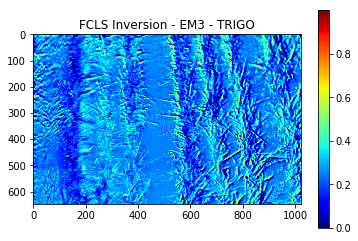

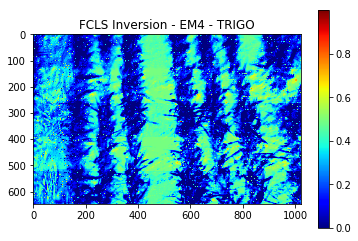

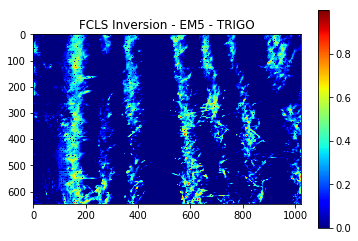

Time: 1300.23386002


<Figure size 432x288 with 0 Axes>

In [ ]:
start_time = time.time()
am = amap.FCLS() #object amap Fully Constrained Least Squares
amaps = am.map(hypercube,U,normalize=False) 
am.display(colorMap='jet',columns=n_endmembers,suffix='TRIGO') # Plot abundance maps
elapsed_time = time.time() - start_time
print('Time: ' + str(elapsed_time))

In [ ]:
print('Abundance Map Mean Values:')
print('EM1:',np.mean(amaps[:,:,0]))
print('EM2:',np.mean(amaps[:,:,1]))
print('EM3:',np.mean(amaps[:,:,2]))
print('EM4:',np.mean(amaps[:,:,3]))
print('EM5:',np.mean(amaps[:,:,4]))

Abundance Map Mean Values:
('EM1:', 0.29846594)
('EM2:', 0.11766512)
('EM3:', 0.25329566)
('EM4:', 0.24680753)
('EM5:', 0.083765686)


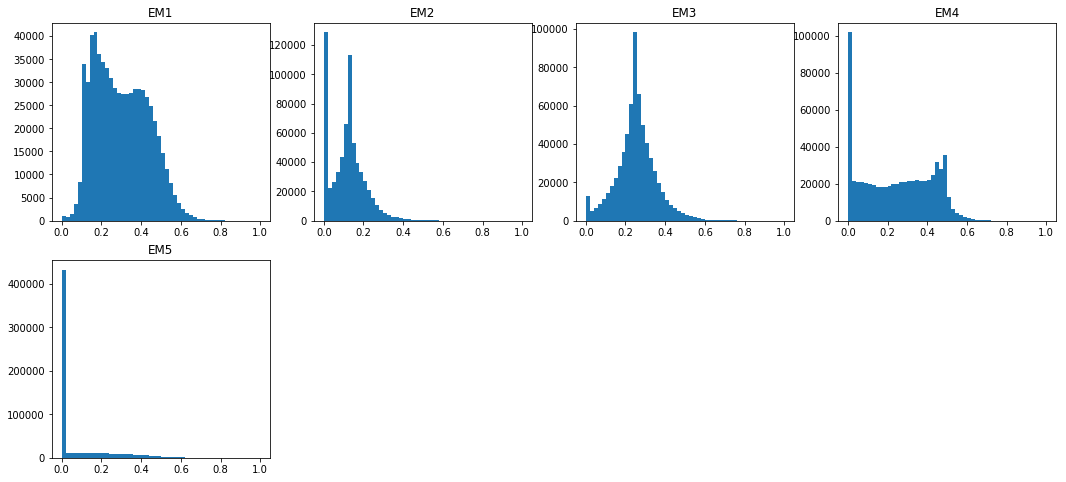

In [ ]:
fig = plt.figure(figsize=(18,8))

ax1 = fig.add_subplot(2,4,1); plt.title('EM1')
amap1_hist = plt.hist(np.ndarray.flatten(amaps[:,:,0]),bins=50,range=[0,1.0]) 

ax2 = fig.add_subplot(2,4,2); plt.title('EM2')
amap1_hist = plt.hist(np.ndarray.flatten(amaps[:,:,1]),bins=50,range=[0,1.0]) 

ax3 = fig.add_subplot(2,4,3); plt.title('EM3')
amap1_hist = plt.hist(np.ndarray.flatten(amaps[:,:,2]),bins=50,range=[0,1.0]) 

ax4 = fig.add_subplot(2,4,4); plt.title('EM4')
amap1_hist = plt.hist(np.ndarray.flatten(amaps[:,:,3]),bins=50,range=[0,1.0]) 

ax5 = fig.add_subplot(2,4,5); plt.title('EM5')
amap1_hist = plt.hist(np.ndarray.flatten(amaps[:,:,4]),bins=50,range=[0,1.0]) 

Automatic Target Generation Process (ATGP)

In [ ]:
ee2 = eea.ATGP() #Automatic Target Generation Process (ATGP)
n_endmembers =5
U = ee2.extract(hypercube,n_endmembers)

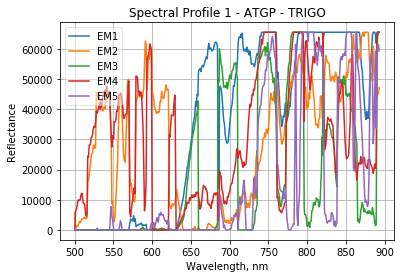

In [ ]:
ee2_axes = {}
ee2_axes['wavelength'] = [float(i) for i in dirs3]
ee2_axes['x']='Wavelength, nm' #x axis label
ee2_axes['y']='Reflectance' #y axis label 
ee2.display(axes=ee2_axes,suffix='TRIGO')

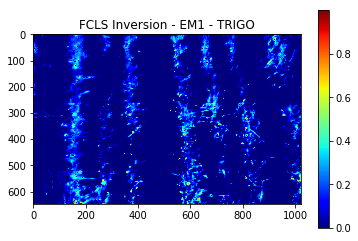

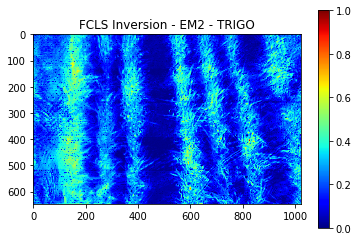

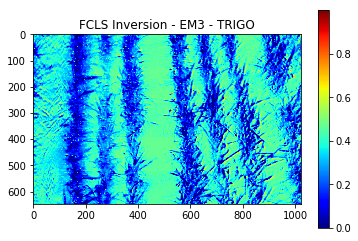

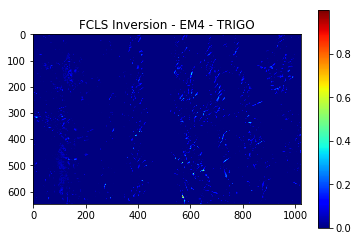

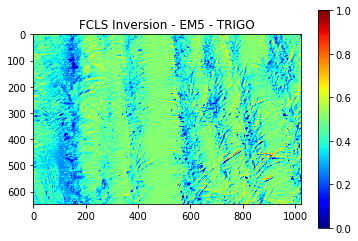

Time: 1689.13659596


<Figure size 432x288 with 0 Axes>

In [ ]:
start_time = time.time()
am = amap.FCLS() 
amaps = am.map(hypercube,U,normalize=False) 
am.display(colorMap='jet',columns=n_endmembers,suffix='TRIGO') 
elapsed_time = time.time() - start_time
print('Time: ' + str(elapsed_time))

In [ ]:
print('Abundance Map Mean Values:')
print('EM1:',np.mean(amaps[:,:,0]))
print('EM2:',np.mean(amaps[:,:,1]))
print('EM3:',np.mean(amaps[:,:,2]))
print('EM4:',np.mean(amaps[:,:,3]))
print('EM5:',np.mean(amaps[:,:,4]))

Abundance Map Mean Values:
('EM1:', 0.03773699)
('EM2:', 0.20394415)
('EM3:', 0.31555143)
('EM4:', 0.004074064)
('EM5:', 0.43869326)


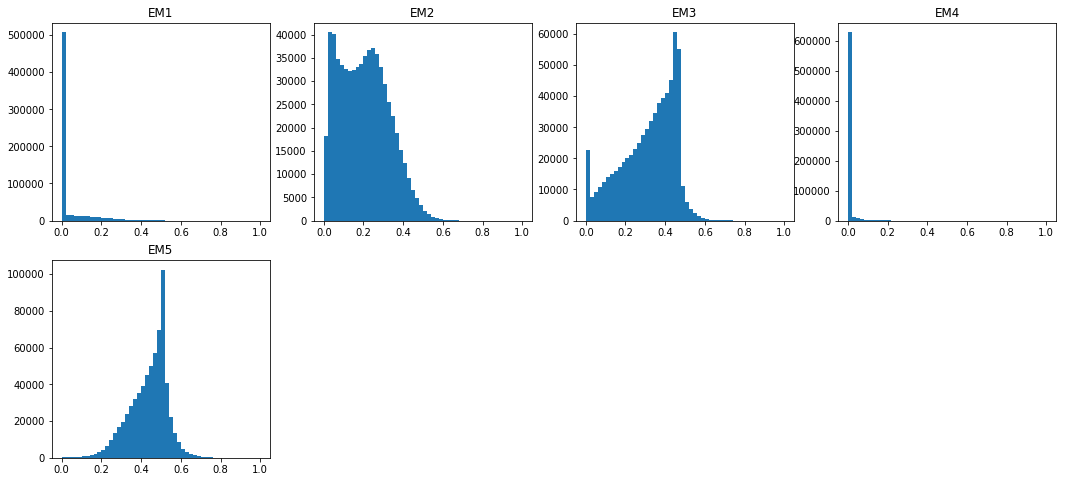

In [ ]:
fig = plt.figure(figsize=(18,8))

ax1 = fig.add_subplot(2,4,1); plt.title('EM1')
amap1_hist = plt.hist(np.ndarray.flatten(amaps[:,:,0]),bins=50,range=[0,1.0]) 

ax2 = fig.add_subplot(2,4,2); plt.title('EM2')
amap1_hist = plt.hist(np.ndarray.flatten(amaps[:,:,1]),bins=50,range=[0,1.0]) 

ax3 = fig.add_subplot(2,4,3); plt.title('EM3')
amap1_hist = plt.hist(np.ndarray.flatten(amaps[:,:,2]),bins=50,range=[0,1.0]) 

ax4 = fig.add_subplot(2,4,4); plt.title('EM4')
amap1_hist = plt.hist(np.ndarray.flatten(amaps[:,:,3]),bins=50,range=[0,1.0]) 

ax5 = fig.add_subplot(2,4,5); plt.title('EM5')
amap1_hist = plt.hist(np.ndarray.flatten(amaps[:,:,4]),bins=50,range=[0,1.0]) 

Fast Iterative Pixel Purity Index (FIPPI)

In [20]:
ee3 = eea.FIPPI() #Fast Iterative Pixel Purity Index (FIPPI)
n_endmembers =5
U = ee3.extract(hypercube,q=n_endmembers)

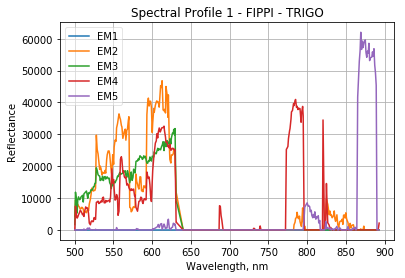

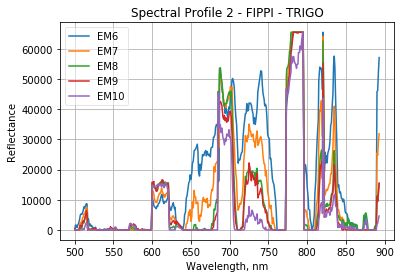

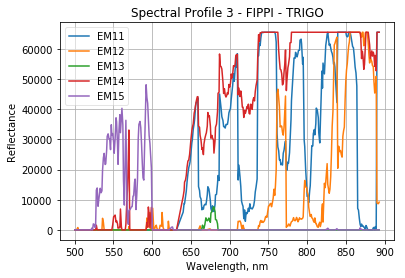

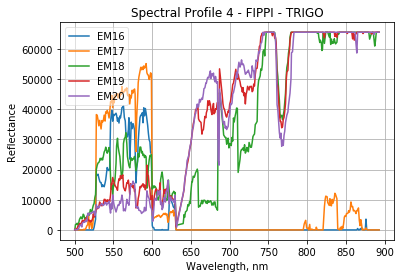

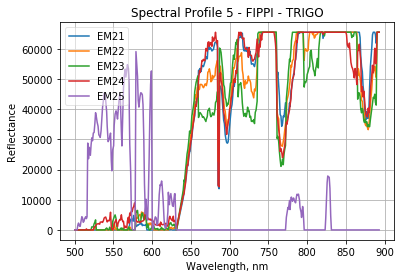

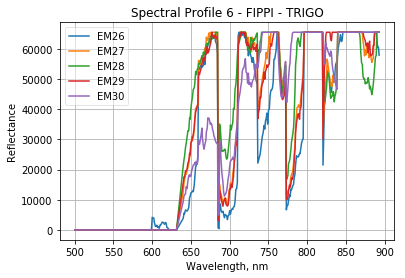

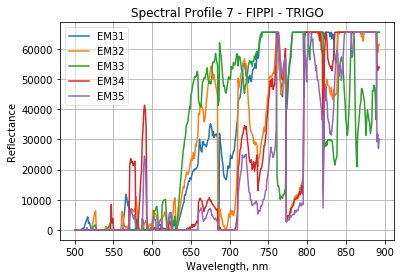

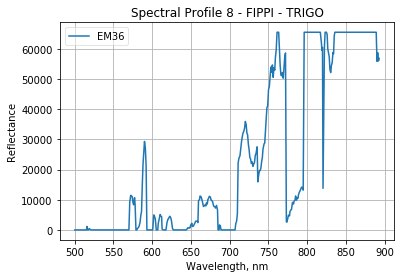

In [21]:
ee3_axes = {}
ee3_axes['wavelength'] = [float(i) for i in dirs3]
ee3_axes['x']='Wavelength, nm' #x axis label
ee3_axes['y']='Reflectance' #y axis label 
ee3.display(axes=ee3_axes,suffix='TRIGO')

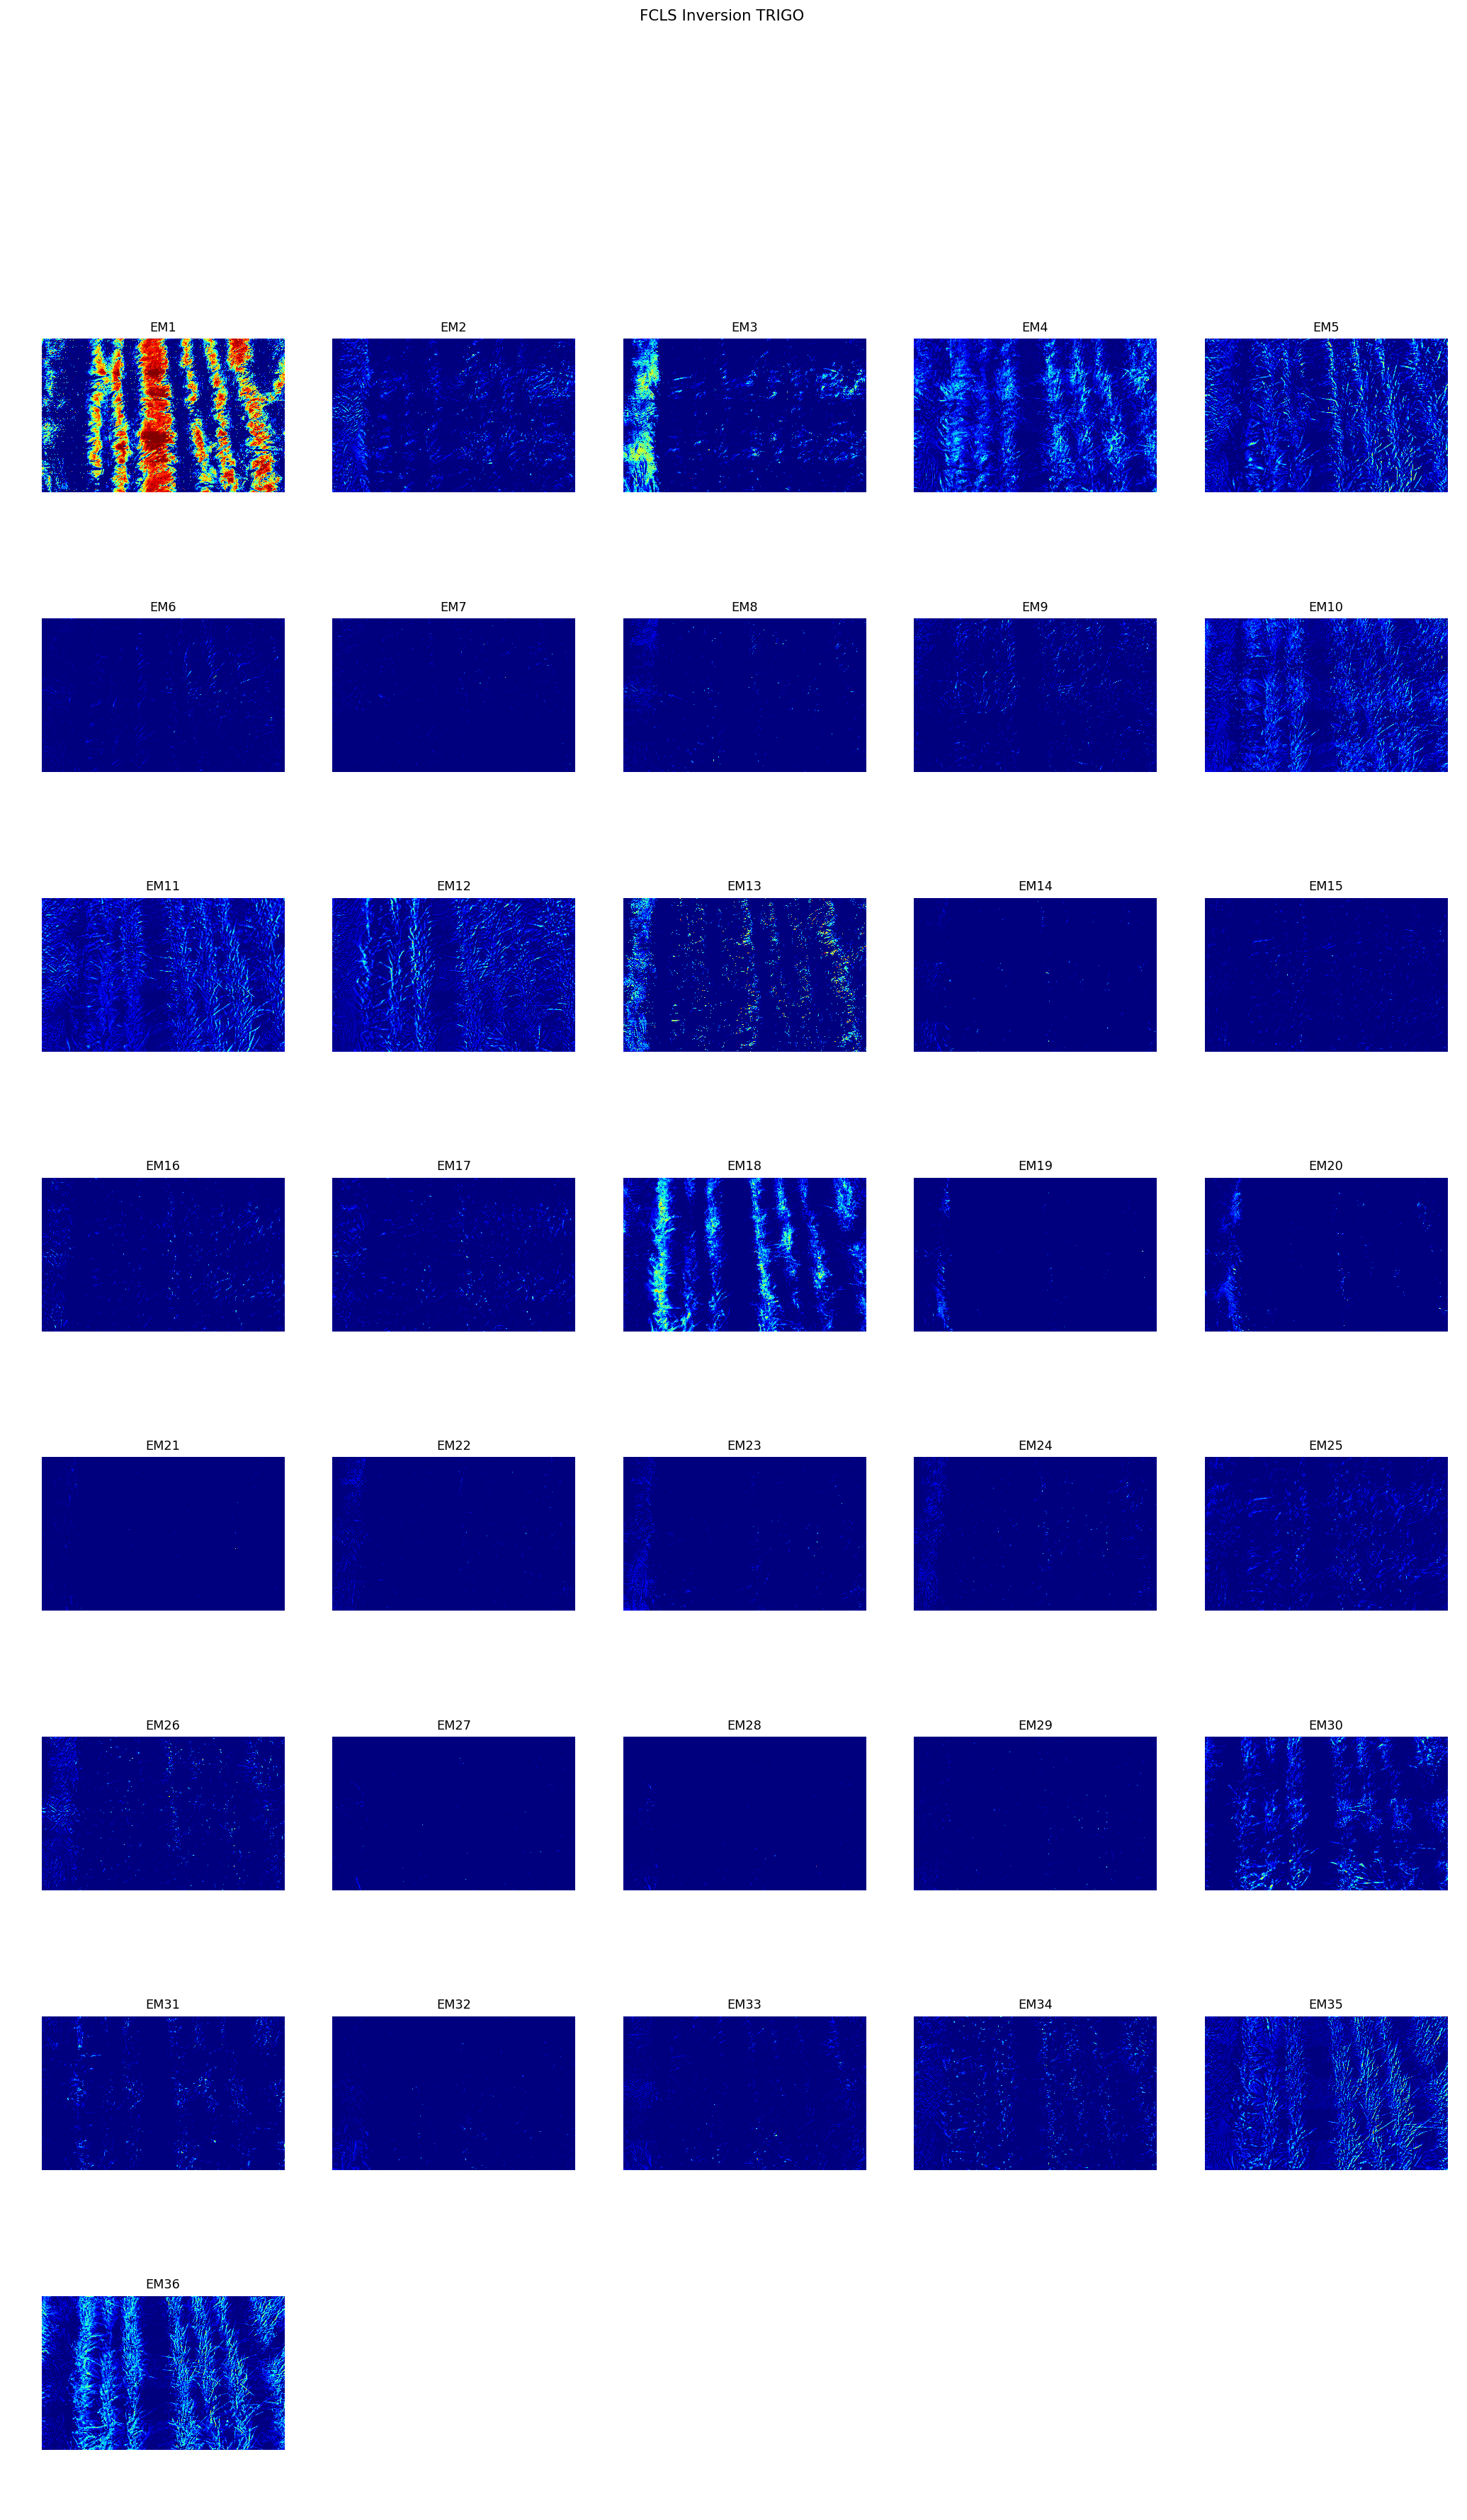

Time: 3537.45097685


<Figure size 432x288 with 0 Axes>

In [22]:
start_time = time.time()
am = amap.FCLS() #object amap Fully Constrained Least Squares
amaps = am.map(hypercube,U,normalize=False) 
am.display(colorMap='jet',columns=n_endmembers,suffix='TRIGO') # Plot abundance maps
elapsed_time = time.time() - start_time
print('Time: ' + str(elapsed_time))